# Tarea 1 de Física computacional
## Aquino Chapa Martha Abril
### Hecho en Python

In [1]:
from pylab import *
import random
from numpy import array
from numpy import *
import math

## 1. Realice y explique los desarrollos necesarios para obtener los siguientes algoritmos:
##### (a) Encuentre una expresi´on para la segunda derivada num´erica de orden 4 con malla uniforme. (Se desprecian téminos $h^{5}$ en la serie de Taylor)


Iniciamos expandiendo en serie de Taylor la función f en 4 diferentes puntos alrededor de $x_0$

$$
f(x_0+h)=f(x_0) + f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 + \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-h)=f(x_0) - f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 - \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0+2h)=f(x_0) + 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-2h)=f(x_0) - 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
Debido a que queremos queremos la segunda derivada de orden cuatro despreciamos los términos de orden $h^5$, sumamos la primera y segunda expresión así como la tercera y cuarta expresión. Con lo que obtenemos las siguientes dos ecuaciones:

$$
f(x_0+h)+f(x_0-h)=2f(x_0)+f^{(2)}(x_0)h^2 + \frac{1}{12}f^{(4)}(x_0)h^4
$$
$$
f(x_0+2h)+f(x_0-2h)=2f(x_0)+4f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$

Ahora mutiplicamos la primera de estas igualdades por $16$ y la segundad igualdad por $-1$ tenemos el siguiente sistema de ecuaciones:
$$
16f(x_0+h)+16f(x_0-h)=32f(x_0) + 16f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$
$$
-f(x_0+2h)-f(x_0-2h)=-2f(x_0)-4f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(4)}(x_0)h^4
$$
Al sumar las dos ecuaciones anteriores se obtiene: 
$$
16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h)=30f(x_0)+12f^{(2)}(x_0)h^2
$$

Por lo que tenemos la expresión para la segunda derivada de orden cuatro:

$$
f^{(2)}(x_0) = \frac{16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h) - 30f(x_0)}{12h^2}
$$
Donde se ha tomado $h=[x+i]-h[i]$ y con esto nos es posible escribir la segunda derivada de orden cuatro en $x[i]$ como:
$$
f_i'' = \frac{-\frac{26}{3}f_{i+1}+\frac{19}{2}f_{i+2}-\frac{14}{3}f_{i+3}+\frac{11}{12}f_{i+4}+\frac{35}{12}f_i}{h^2}
$$

Hay que notar que la expresión anterior hace uso del hecho de que se tienen puntos a la derecha y a la izquiera de $x_0$, por lo cual la expresión anterior no se vale en los puntos frontera. Entonces obtengamos la derivada en los puntos frontera. Por lo cual es necesario conocer la segunda entrada del siguiente sistema de ecuaciones:
$$
\begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{6} & \frac{1}{24} \\
2 & 2 & \frac{4}{3} & \frac{2}{3} \\
3 & \frac{9}{2} & \frac{9}{2} & \frac{27}{8} \\
4 & 8 & \frac{32}{3} & \frac{32}{3}
\end{bmatrix}
\begin{bmatrix}
hf_i' \\
h^2f_i'' \\
h^3f_i''' \\
h^4f_i''''
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i \\
f_{i+3}-f_i \\
f_{i+4}-f_i 
\end{bmatrix}
$$
Al resolver se llega a que:
$$
f_i'' = \frac{-\frac{26}{3}f_{i+1}+\frac{19}{2}f_{i+2}-\frac{14}{3}f_{i+3}+\frac{11}{12}f_{i+4}+\frac{35}{12}f_i}{h^2}
$$



##### (b) Encuentre una expresión para la derivada numérica de 2o orden para una malla no uniforme. (Se desprecian términos $h^{3}$ en la serie de Taylor)
Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces los siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$
f(x_0-h_1)=f(x_0)-f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Al restar las ecuaciones anteriores se obtiene:
$$
f(x_0-h_1)-f(x_0+h_2)=f^{(1)}(x_0)(h_1+h_2)
$$
Por lo cual la derivada de segundo orden en una malla no uniforme es:
$$
f^{(1)}(x_0)=\frac{f(x_0+h_2)-f(x_0-h_1)}{h_1+h_2}
$$
Hay que notar que la expresión anterior hace uso del hecho de que se tienen puntos a la derecha y a la izquiera de $x_0$, por lo cual la expresión anterior no se vale en los puntos frontera. Entonces obtengamos la derivada en los puntos frontera. Por lo cual es necesario conocer la segunda entrada del siguiente sistema de ecuaciones:

$$
\begin{bmatrix}
h_1 & \frac{1}{2}h_1^2 \\
h_2 & \frac{1}{2}h_2^2
\end{bmatrix}
\begin{bmatrix}
f^{(1)}(x_0) \\
f^{(2)}(x_0)
\end{bmatrix}
=
\begin{bmatrix}
f(x_0+h_1)-f(x_0) \\
f(x_0+h_2)-f(x_0)
\end{bmatrix}
$$
El cual al resolver para la primera derivada: $f^{(1)}$ se obtiene que:
$$
f^{(1)}(x_0) = -\frac{h_2(f(x_0-h_1)-f(x_0))}{h_1(h_2+h_1)} + \frac{h_1(f(x_0+h_2)-f(x_0))}{h_2(h_2+h_1)}
$$

##### (c) Encuentre una expresión para la segunda derivada numérica de 2o orden con malla no uniforme. (Se desprecian términos $h^{3}$  en la serie de Taylor)

Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces los siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$ f(x0-h_1)=f(x_0)-f^{(1)}(x_0)h_1+f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$
$$ f(x0+h_2)=f(x_0)+f^{(1)}(x_0)h_2+f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

Restando las ecuaciones anteriores se obtiene que:

$$f(x_0+h_22)-f(x_0-h_1)=f^{(1)}(x_0)(h_2+h_1)+f^{(2)}(x_0)(h_2^{2}-h_1^{2}) $$ 
Al despejar la segunda derivada:

$$f^{(2)}(x_0)=\frac{f(x_0+h_2)-f(x_0-h_1)-f^{(1)}(x_0)(h_1+h_2)}{h_2^{2}-h_1^{2}} $$
Sustituyendo entonces la primera derivada en mallas no uniformes, que se obtuvo en el ejercicio pasado

$$ f^{(2)}(x_0)=\frac{f(x_0+h_2)-f(x_0-h_1)}{h_2^{2}-h_1^{2}}-\frac{(f(x_0+h_2)-f(x_0-h_1))}{(h_2^{2}-h_1^{2})(h_1+h_2)} $$

### Utilizando las funciones anteriores calcule el tiempo promedio para una malla con 500 puntos en cadauno de los algoritmos anteriores. De una explicación de las ventajas y desventajas de cada una las funciones antes mencionadas.

C:\Users\marth\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\marth\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


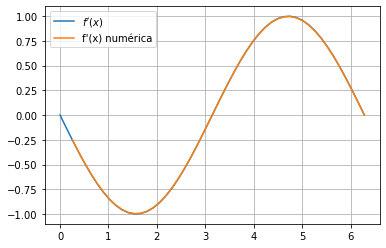

In [2]:
##Definimos la primera derivada para una función f y cuya malla no es uniforme.
def deriv(f,x):
    f_prima = zeros(len(f))
    for i in range (2,len(f)-1):
        #h[i]=x[i]-x[i-1] #distancia a la izquierda de xi
        #g[i]=x[i+1]-x[i]
        f_prima[i]=(f[i+1]-f[i-1])/(x[i]-x[i-1]+x[i+1]-x[i])
    # calcular el ultimo punto
        h1=x[2]-x[1]
        h2=x[3]-x[2]
        
        h11=x[-1]-x[-2]
        h22=x[0]-x[-1]
        f_prima[1] = h2*(f[2]-f[1] )/(h1*h2-h1*h1)- h1*(f[3]-f[1])/(h2*h2-h2*h1)
       # f_prima[-1]=-(h11*(f[-2]-f[-1])/(h22*h11-h22*h22))+(h22*(f[-3]-f[-1])/(h11*h11-h22*h11))
       # f_prima[-1]=-(h11*(f[-2]-f[-1])/(h22*h11-h22*h22))+(h22*(f[-3]-f[-1])/(h11*h11-h22*h11))### revisar
    return f_prima
##Definimos una función f para transformar cualquier malla uniforme a una no uniforme.
def f(x):
    return x#**(1/2)
###Escogemos la malla
x = np.linspace(0, 2*pi, 50) #2*np.pi*f(np.linspace(0, 1, 50, endpoint=False))
#x=linspace(M)
y = cos(x)
y_deriv = -sin(x)
y_num_deriv = deriv(y,x)
#plot(x,y,label="$f(x)$")
plot(x,y_deriv,label="$f'(x)$")
plot(x,y_num_deriv,label="f'(x) numérica")
legend(),grid()
show()

In [3]:
m1 = []
for m in range(1,100):
    m1.append(2*pi/m)
m1.sort()
#print (m1)
m2 = []
for n in range(9802,10202):
    m2.append(n)
m2.sort()
#print(m2)

In [4]:
M=(m1,m2)
#print(M)

In [5]:
#x1 =numpy.array(0, 2*pi, 9)
#x2=x1/2
#x3= np.array(pi+0.01, 2*pi, 9)
#x4=([x2],x[3])

In [6]:
#def h1(i):
 #   return h1(i)=x[i]-x[i-1]
#def h2(i):
 #   return h2[i]=x[i+1]-x[i]
# primer derivada en un malla no uniforme

def deriv(f,x):
    f_prima = zeros(len(f))
    for i in range (2,len(f)-1):
        #h[i]=x[i]-x[i-1] #distancia a la izquierda de xi
        #g[i]=x[i+1]-x[i]
        f_prima[i]=(f[i+1]-f[i-1])/(x[i]-x[i-1]+x[i+1]-x[i])
    # calcular el ultimo punto
        h1=x[2]-x[1]
        h2=x[3]-x[2]
        
        h11=x[-1]-x[-2]
        h22=x[0]-x[-1]
        f_prima[1] = h2*(f[2]-f[1] )/(h1*h2-h1*h1)- h1*(f[3]-f[1])/(h2*h2-h2*h1)
       # f_prima[-1]=-(h11*(f[-2]-f[-1])/(h22*h11-h22*h22))+(h22*(f[-3]-f[-1])/(h11*h11-h22*h11))
       # f_prima[-1]=-(h11*(f[-2]-f[-1])/(h22*h11-h22*h22))+(h22*(f[-3]-f[-1])/(h11*h11-h22*h11))### revisar
    return f_prima

C:\Users\marth\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\marth\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


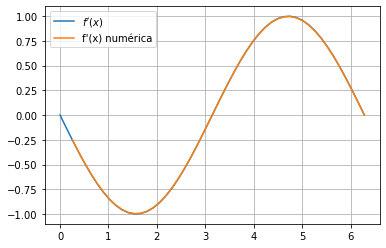

In [7]:
def f(x):
    return x#**(1/2)
x = np.linspace(0, 2*pi, 50) #2*np.pi*f(np.linspace(0, 1, 50, endpoint=False))
#x=linspace(M)
y = cos(x)
y_deriv = -sin(x)
y_num_deriv = deriv(y,x)
#plot(x,y,label="$f(x)$")
plot(x,y_deriv,label="$f'(x)$")
plot(x,y_num_deriv,label="f'(x) numérica")
legend(),grid()
show()